# Part 4: Logistic Regression

In [4]:
graphics_toolkit ("gnuplot");

In [6]:
x = load('datasets/ex4x.dat'); 
y = load('datasets/ex4y.dat');

[m, n] = size(x);

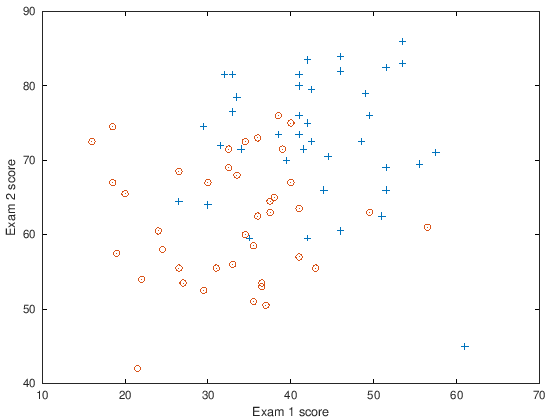

In [7]:

x = [ones(m, 1), x]; 

figure
pos = find(y); neg = find(y == 0);
plot(x(pos, 2), x(pos,3), '+');
hold on;
plot(x(neg, 2), x(neg, 3), 'o');
hold on;
xlabel('Exam 1 score');
ylabel('Exam 2 score');

In [8]:
g = inline('1.0 ./ (1.0 + exp(-z))'); 

In [9]:
function [theta, J] = newtonMethod(x, y, m, n, MAX_ITR)
    g = inline('1.0 ./ (1.0 + exp(-z))'); 
    theta = zeros(n+1, 1);
    % Newton's method
    J = zeros(MAX_ITR, 1);

    for i = 1:MAX_ITR
        % Calculate the hypothesis function
        z = x * theta;
        h = g(z);
        grad = (1/m).*x' * (h-y);
        H = (1/m).*x' * diag(h) * diag(1-h) * x;
        J(i) =(1/m)*sum(-y.*log(h) - (1-y).*log(1-h));

        theta = theta - H\grad;
    end
end

In [12]:
[theta, J] = newtonMethod(x, y, m, n, 7);
theta

theta =

  -16.3787
    0.1483
    0.1589



### Question: Determine the probability that a student with a score of 20 on Exam 1 and a score of 80 on Exam 2 will not be admitted.

In [11]:
not_admitted_probability = 1 - g([1, 20, 80]*theta);
fprintf("Probability that student is not admitted is: %i", not_admitted_probability);

Probability that student is not admitted is: 0.668022

### Plot Decision Boundary

In [ ]:
plot(x(pos, 2), x(pos,3), '+');
hold on;

plot(x(neg, 2), x(neg, 3), 'o');
hold on;

xlabel('Exam 1 score');
ylabel('Exam 2 score');

hold on;

plot_x = [min(x(:,2))-2,  max(x(:,2))+2];
plot_y = (-1./theta(3)).*(theta(2).*plot_x +theta(1));

plot(plot_x, plot_y);
legend('Admitted', 'Not admitted', 'Decision Boundary');

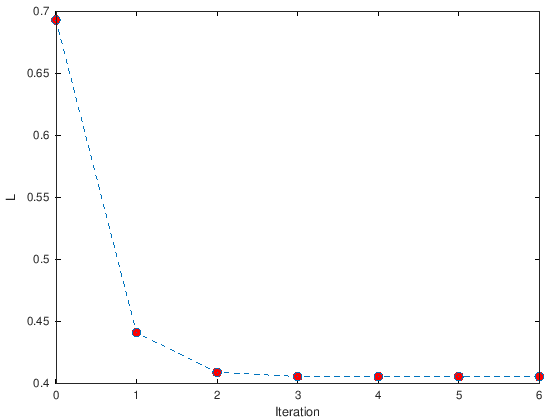

In [14]:

% Plot J
figure
plot(0:7-1, J, 'o--', 'MarkerFaceColor', 'r', 'MarkerSize', 8);
xlabel('Iteration'); 
ylabel('L');